In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sms

In [2]:
date_columns = ['FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE', 'REPORTED_DATE']
denver_crime = pd.read_csv('crime.csv', parse_dates=date_columns)
dcrime2.dtypes

In [17]:
print(denver_crime.shape)

(470278, 7)


In [15]:
denver_crime.dtypes

crime_type                object
crime_category            object
date              datetime64[ns]
address                   object
y_lon                    float64
x_lat                    float64
neighborhood              object
dtype: object

In [4]:
columns_to_keep = ['OFFENSE_TYPE_ID','OFFENSE_CATEGORY_ID','REPORTED_DATE','INCIDENT_ADDRESS','GEO_LON','GEO_LAT','NEIGHBORHOOD_ID']
denver_crime = denver_crime[columns_to_keep]
denver_crime = denver_crime.copy()
newcols = {
    'OFFENSE_TYPE_ID':'crime_type',
    'OFFENSE_CATEGORY_ID':'crime_category',
    'REPORTED_DATE':'date',
    'INCIDENT_ADDRESS':'address',
    'GEO_LON':'y_lon',
    'GEO_LAT':'x_lat',
    'NEIGHBORHOOD_ID':'neighborhood'
}
denver_crime.rename(columns=newcols,inplace=True)
denver_crime.head()

,crime_type,crime_category,date,address,y_lon,x_lat,neighborhood
0,criminal-mischief-other,public-disorder,2022-01-04 20:36:00,128 S CANOSA CT,-105.018825,39.714268,valverde
1,criminal-mischief-other,public-disorder,2022-01-03 11:01:00,650 15TH ST,-104.993418,39.743649,cbd
2,criminal-mischief-other,public-disorder,2022-01-03 06:11:00,919 E COLFAX AVE,-104.975557,39.740130,north-capitol-hill
3,criminal-mischief-other,public-disorder,2022-01-03 21:12:00,2345 W ALAMEDA AVE,-105.014892,39.711518,valverde
4,criminal-mischief-other,public-disorder,2022-01-03 20:31:00,7800 E SMITH RD,-104.897950,39.769688,central-park


In [5]:
murder = denver_crime[denver_crime['crime_category']=='murder']
murder  

In [6]:
murder = murder.copy()

In [7]:
murder.date = pd.to_datetime(murder.date)


# Create `locations` by subsetting only Latitude and Longitude from the dataset 
locations = murder[['x_lat','y_lon']]

# Create `deaths_list` by transforming the DataFrame to list of lists 
murderss = locations.values.tolist()

In [8]:
# Plot the data on map (map location is provided) using folium and for loop for plotting all the points
import folium

map = folium.Map(location=[39.7392,-104.9903], tiles='openstreetmap', zoom_start=11)
for point in range(0, len(murderss)):
    folium.CircleMarker(murderss[point], radius=8, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map)
map

Text(0, 0.5, 'crimes during time period')

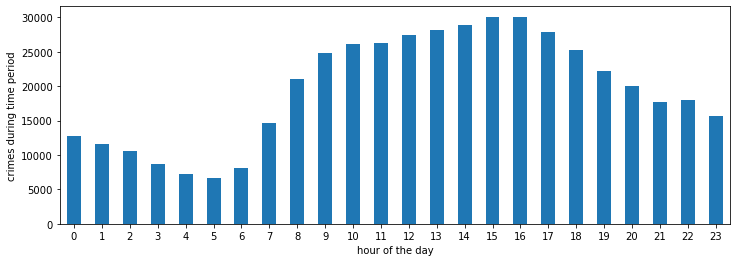

In [9]:
fig, axs = plt.subplots(figsize=(12, 4))
denver_crime.groupby(denver_crime['date'].dt.hour)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('hour of the day');
plt.ylabel('crimes during time period')

In [10]:
denver_crime.groupby(denver_crime['date'].dt.hour)['crime_category'].count()

date
0     12782
1     11596
2     10539
3      8738
4      7263
5      6681
6      8121
7     14716
8     21100
9     24895
10    26165
11    26330
12    27415
13    28111
14    28882
15    30108
16    30027
17    27883
18    25294
19    22170
20    20094
21    17759
22    17978
23    15631
Name: crime_category, dtype: int64